In [2]:
# import turtle
from turtle import * # allows you to omit turtle. in front of all the methods

# This is needed to prevent terminator error every other run (exit on click turns this builtin to False causing a problem for some reason)
TurtleScreen._RUNNING=True
# note before running place cursor in IDE at end of cell (otherwise terminator error - why?)
# draw a shape
# Cursor starts at 0,0 in the middle of the canvas facing to the right
speed(0) # sets to fastest drawing speed
pensize(5)

forward(300)

# relative to the current cursor direction/facing this will turn it x degrees to the left:

left(120)

# Now we can draw a line in the direction the turtle is facing

forward(300)

left(120)

backward(300)

Screen().exitonclick()


In [14]:
import math
import numpy as np

def random(st):
    return math.sin(np.dot(st, [12.9898,78.233])) * 43758.5453123 % 1.0

def noise(st):
    i = [math.floor(s) for s in st]
    f = [s - i[idx] for idx, s in enumerate(st)]

    a = random(i)
    b = random([i[0] + 1.0, i[1]])
    c = random([i[0], i[1] + 1.0])
    d = random([i[0] + 1.0, i[1] + 1.0])

    u = [f[idx] * f[idx] * (3.0 - 2.0 * f[idx]) for idx in range(2)]

    return (a +
            (b - a) * u[0] +
            (c - a) * u[1] * (1.0 - u[0]) +
            (d - b) * u[0] * u[1])

OCTAVES = 6

def fbm(st):
    value = 0.0
    amplitude = 0.5
    frequency = 0.0

    for i in range(OCTAVES):
        value += amplitude * noise(st)
        st = [s * 2.0 for s in st]
        amplitude *= 0.5

    return value

def main(u_resolution, gl_FragCoord):
    st = [gl_FragCoord[0] / u_resolution[0], gl_FragCoord[1] / u_resolution[1]]
    st[0] *= u_resolution[0] / u_resolution[1]

    color = [0.0, 0.0, 0.0]
    color[0] += fbm([st[0] * 3.0, st[1]])

    return color

# Sample usage
u_resolution = [800.0, 600.0]
gl_FragCoord = [400.0, 300.0]
result = main(u_resolution, gl_FragCoord)
print(result)


[0.3378642934229674, 0.0, 0.0]


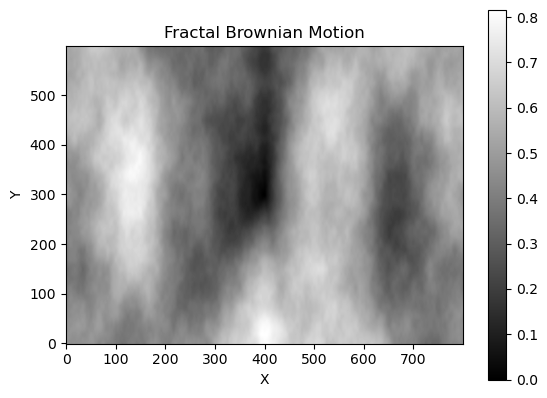

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate noise values for a given grid of points
def generate_noise(width, height):
    noise_values = np.zeros((height, width))
    for y in range(height):
        for x in range(width):
            # Scale the coordinates to the range [-1, 1]
            st = [(2 * x / width - 1) * 3, (2 * y / height - 1)]
            noise_values[y, x] = fbm(st)
    return noise_values

# Define the size of the grid
width = 800
height = 600

# Generate noise values
noise_values = generate_noise(width, height)

# Plot the noise values as a grayscale image
plt.imshow(noise_values, cmap='gray', origin='lower')
plt.colorbar()
plt.title('Fractal Brownian Motion')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


In [12]:


# import numpy as np
# import matplotlib.pyplot as plt

# def random(st):
#     return np.sin(np.dot(st, [12.9898,78.233])) * 43758.5453123 % 1.0

# def noise(st):
#     i = np.floor(st).astype(int)
#     f = st - i

#     a = random(i)
#     b = random(i + np.array([1, 0]))
#     c = random(i + np.array([0, 1]))
#     d = random(i + np.array([1, 1]))

#     u = f * f * (3.0 - 2.0 * f)

#     return (a +
#             (b - a) * u[0] +
#             (c - a) * u[1] * (1.0 - u[0]) +
#             (d - b) * u[0] * u[1])

# OCTAVES = 6

# def fbm(st):
#     value = 0.0
#     amplitude = 0.5
#     frequency = 0.0

#     for i in range(OCTAVES):
#         value += amplitude * noise(st)
#         st *= 2.0
#         amplitude *= 0.5

#     return value

# def generate_noise_vectorized(width, height):
#     x = np.linspace(-1, 1, width)
#     y = np.linspace(-1, 1, height)
#     xx, yy = np.meshgrid(x, y)
#     st = np.stack((xx, yy), axis=-1)

#     noise_values = fbm(st.reshape(height, width, 2))

#     return noise_values

# width = 800
# height = 600

# noise_values = generate_noise_vectorized(width, height)

# plt.imshow(noise_values.T, cmap='gray', origin='lower')
# plt.colorbar()
# plt.title('Fractal Brownian Motion')
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.show()


ValueError: operands could not be broadcast together with shapes (600,800) (800,2) 

C:\Users\New AMD 5600G Build\AppData\Local\Temp\ipykernel_15184\1618640328.py:18: RuntimeWarning: divide by zero encountered in power
  filter = r ** (-H / 2)


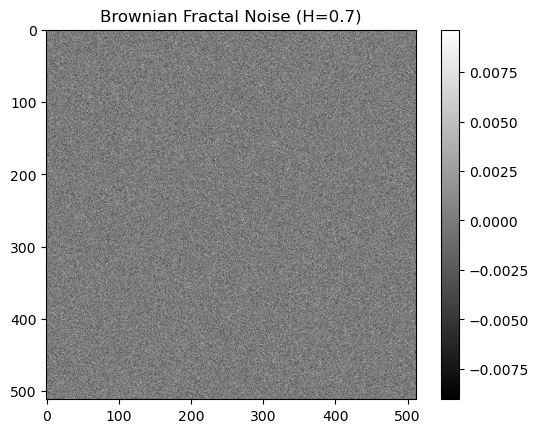

In [17]:
# Built in way of creating Bfn

import numpy as np
import matplotlib.pyplot as plt

# Parameters
shape = (512, 512)  # Size of the fractal noise
H = 0.7             # Hurst exponent (controls the "fractality" of the noise)

# Generate grid of points
x, y = np.meshgrid(np.linspace(0, 1, shape[0]), np.linspace(0, 1, shape[1]), indexing='ij')

# Calculate power spectrum
freqs = np.fft.fftfreq(shape[0])[:, None] + 1j * np.fft.fftfreq(shape[1])
r = np.abs(freqs)

# Filter by power spectrum
filter = r ** (-H / 2)
filter[0, 0] = 0  # Avoid division by zero
noise = np.fft.ifft2(np.fft.fftshift(filter * np.random.normal(size=shape))).real

# Plot
plt.imshow(noise, cmap='gray')
plt.colorbar()
plt.title(f"Brownian Fractal Noise (H={H})")
plt.show()
